In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statistics
from scipy import stats
import math
%matplotlib inline
np.random.seed(2020)

# Central limit theorem
MOTIVATION: The central limit theorem states that if you have a population with mean μ and standard deviation σ and take
sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). If the population is normal, then the theorem holds true even for samples smaller than 30.

In [46]:
#Generate 5000 uniformly distributed data points between 0 and 1 300 times
M = 300
n = 5000
a = 0
b = 1

data = np.zeros(n)
meanValues=np.zeros(M)
stdValues=np.zeros(M)
for i in range(M):
    data = np.random.uniform(low=a, high=b, size=n)
    meanValues[i]=data.mean()
    stdValues[i]=data.std()
    
print("pop. mean: {}; pop. stdev: {}".format((b+a)/2, (b-a)/(math.sqrt(12))))


pop. mean: 0.5; pop. stdev: 0.2886751345948129


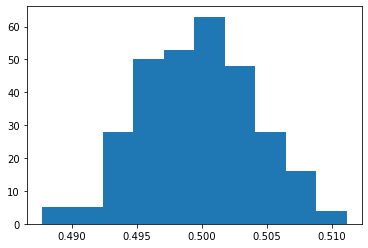

In [53]:
f = plt.hist(meanValues)

# Normality tests
* Kolmogrov-Smirnov Test
* Shapiro-Wilk Test

In [54]:
#Apply Kolmogrov-Smirnov Test for normality test
#The KS test is only valid for continuous distributions. 
#The two-sample test tests whether the two independent samples are drawn from the same continuous distribution.
resultKS = stats.kstest(data, cdf='norm',alternative="two-sided")
print("kstest: ", resultKS)

#p-value returned is 0.0 so it will reject the hypothesis that it comes from normal distribution.
print("shapiro: ", *stats.shapiro(data))
#Shapiro normality test also returned a p-value which is less than zero so it rejects the hypothesis that it comes from ND.

kstest:  KstestResult(statistic=0.8165549547322017, pvalue=2.296382160917218e-22)
shapiro:  0.9274687170982361 0.04207801818847656


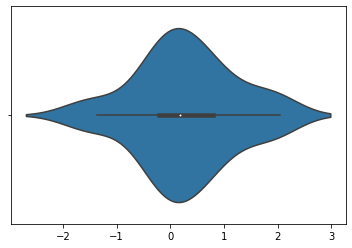

In [56]:
ndata = np.random.normal(size=n)
f = sns.violinplot(y=ndata, orient='h')

In [57]:
print("kstest: ", *stats.kstest(ndata, cdf='norm'))
print("shapiro: ", *stats.shapiro(ndata))

kstest:  0.2127014709907746 0.11393519787228634
shapiro:  0.9676029086112976 0.4758417308330536


# Population Mean Estimation
A uniform r.v. 𝑋 on the interval (𝑎, 𝑏) is a completely random number between 𝑎 and 𝑏. Recall that:


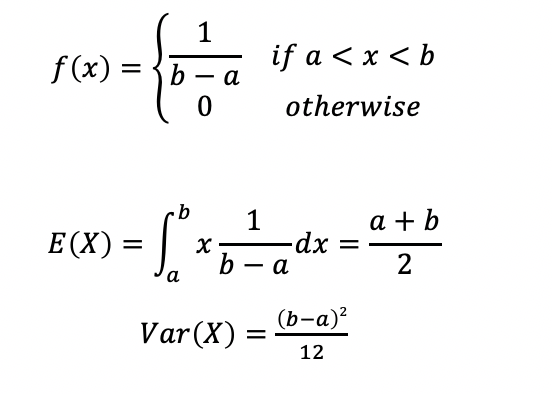

In [58]:
mu = 5

data = np.random.uniform(low=0, high=2*mu, size=100000)
sigma = (2*mu-0)*math.sqrt(1/12)

#data = np.random.exponential(scale=mu, size=100000)
#sigma = mu

#sigma = 5
#data = np.random.normal(loc=mu, scale=sigma, size=100000)

print("pop. mean: {}; pop. stdev: {}".format(mu, sigma))
print("sam. mean: {}; sam. stdev: {}".format(data.mean(), data.std(ddof=1)))

pop. mean: 5; pop. stdev: 2.8867513459481287
sam. mean: 4.996117065914665; sam. stdev: 2.8868819746227286


Type 1 Error 0.043
5.003651423627729 0.525445893753435 2.877985687572192


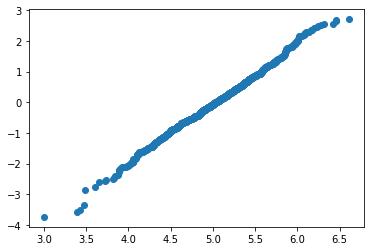

In [59]:
n = 30
M = 1000
x = []
outside = 0
alpha = 0.05

for i in range(M):
    data = np.random.uniform(low=0, high=2*mu, size=n)
    #data = np.random.exponential(scale=mu, size=n)
    #data = np.random.normal(loc=mu, scale=sigma, size=n)
    x.append(data.mean())   
    std = data.std(ddof=1)/math.sqrt(n) #sample std dev
    if abs((x[-1]-mu)/std) > stats.t(df=n-1).ppf(1-alpha/2):
        outside += 1

print("Type 1 Error {}".format(outside/M))
print(statistics.mean(x), statistics.stdev(x), statistics.stdev(x)*math.sqrt(n))
f = plt.scatter(sorted(x), np.sort(np.random.normal(size=M)))

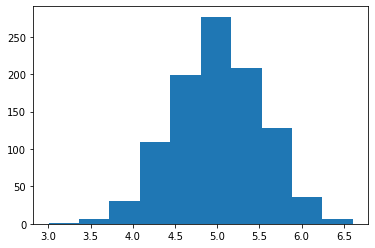

In [60]:
f = plt.hist(x)

In [61]:
print(stats.shapiro(x))

ShapiroResult(statistic=0.9986135959625244, pvalue=0.6301936507225037)


# t test
Ho will not be rejected if err=0!

In [66]:
mu  = 100
n = 30
err = 0  #mu/1000 # try 1, mu/100
test_mu = mu + err
data = np.random.uniform(low=0, high=2*mu, size=n)
#data = np.random.normal(loc=mu, scale=1, size=n)
#data = np.random.exponential(scale=mu, size=n)
print("sample mean:", data.mean())
print("test_mu:", test_mu)
print("t:", (data.mean()-test_mu)/(data.std(ddof=1)/math.sqrt(n)))
stats.ttest_1samp(data, test_mu)

sample mean: 99.96802449899376
test_mu: 100
t: -0.0034150481830351642


Ttest_1sampResult(statistic=-0.0034150481830351642, pvalue=0.9972985754227637)

# Example
The U.S. Farmers' Production Company builds large harvesters. For a harvester to be properly balanced when operating, a 25-pound plate is installed on its side. The machine that produces these plates is set to yield plates that average 25 pounds. The distribution of plates produced from the machine is normal. However, the shop supervisor is worried that the machine is out of adjustment and is producing plates that do not average 25 pounds. To test this concern, he randomly selects 20 of the plates produced the day before and weighs them. The following shows the weights obtained, along with the computed sample mean and sample standard deviation.

We make use of t-test, which is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations is equal to the given population mean. The test assumes that the data is normally distributed.

In [35]:
data = np.array([22.6, 22.2, 23.2, 27.4, 24.5, 
                 27.0, 26.6, 28.1, 26.9, 24.9,
                 26.2, 25.3, 23.1, 24.2, 26.1,
                 25.8, 30.4, 28.6, 23.5, 23.6])
print('mean:', data.mean(), 'stdev:', data.std(ddof=1))
#before applying t-test you should check for normality
print("shapiro: ", *stats.shapiro(data))
stats.ttest_1samp(data, 25)

mean: 25.51 stdev: 2.193267209582904
shapiro:  0.9706425666809082 0.7683868408203125


Ttest_1sampResult(statistic=1.0399049085695, pvalue=0.31143718526822195)

# Type I Error
* Suppose we have uniformly distributed n random numbers between a and b.
* Apply t-test for M different samples (described above) and find the proportion of rejected.

In [67]:
#We generate 1000 times n=100 uniformly distributed random data points.
#We test 1000 times whether the data has a mean of 15
#The test rejects 0.05 times that the data set has a mean of 15

a = 10
b = 20
n = 100
M = 1000
alpha = 0.05
rejected = 0
for i in range(M):
    data = np.random.uniform(low=a, high=b, size=n)
    t, p = stats.ttest_1samp(data,(a+b)/2)
    if p<=alpha:
        rejected += 1

print(rejected/M)

0.054


# Type II Error
* Suppose we have uniformly distributed n random numbers between a and b.
* Apply t-test for M different samples (described above) and find the proportion of accepted.

In [68]:
#We generate 1000 times n=100 uniformly distributed random data points.
#We test 1000 times whether the data has a mean of 16
#The test fails to reject around 0.05 times that the data set has a mean of 16 

a = 10
b = 20
err = 0.1 * (b-a) # 10 percent of range
n = 100 # try 10, 100, 1000
M = 1000
alpha = 0.05
failed_to_reject = 0
for i in range(M):
    data = np.random.uniform(low=a, high=b, size=n)
    t, p = stats.ttest_1samp(data, err + (a+b)/2)
    if p>=alpha:
        failed_to_reject += 1

print(failed_to_reject/M)

0.051


# Proportion Test
n customers arrive at the store, 100*p% of them are old customers.

In [69]:
p = 0.8
error = 0 # try 0.01 and 0.1
n = 100
M = 1000
alpha = 0.05
rejected = 0
for i in range(M):
    data = np.random.binomial(n=1, p=p, size=n)
    if stats.binom_test(x=data.sum(), n=n, p=p+error)<alpha:
        rejected += 1
        
print(rejected/M)

0.057
